In [8]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd

In [9]:
wkdir = '/Users/Marianne/Dropbox (Personlig)/DTU/9. semester/02456_Deep_learning/project/results/'

# Visualize performances

In [10]:
# Load performances
performance = pd.read_csv(wkdir+'model_performances.csv', sep=';')
performance.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
0,CBoW,before,1,2,18.041133,0.000,0.3
1,CBoW,before,5,2,17.910000,0.143,0.1
2,CBoW,before,10,2,17.870000,0.143,0.2
3,CBoW,before,20,2,17.872976,0.143,0.4
4,CBoW,after,1,2,18.000508,0.000,0.2


In [12]:
c_pre = performance.loc[performance.direction == 'before']
c_post = performance.loc[performance.direction == 'after']
c_both = performance.loc[performance.direction == 'both']
c_pre.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
0,CBoW,before,1,2,18.041133,0.000,0.3
1,CBoW,before,5,2,17.910000,0.143,0.1
2,CBoW,before,10,2,17.870000,0.143,0.2
3,CBoW,before,20,2,17.872976,0.143,0.4
12,SG,before,1,2,639.993000,0.000,0.1


In [13]:
c_post.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
4,CBoW,after,1,2,18.000508,0.000,0.20
5,CBoW,after,5,2,17.940000,0.143,0.10
6,CBoW,after,10,2,17.890000,0.143,0.05
7,CBoW,after,20,2,17.866107,0.143,0.25
15,SG,after,1,2,639.993000,0.143,0.10


In [14]:
c_both.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
8,CBoW,both,1,2,17.989137,0.143,0.20
9,CBoW,both,5,2,17.800000,0.143,0.15
10,CBoW,both,10,2,17.740000,0.143,0.20
11,CBoW,both,20,2,17.729718,0.000,0.40
18,SG,both,1,2,4.000000,0.000,0.20


In [15]:
acc = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.acc_b62.values, 'post':c_post.acc_b62.values, 'both':c_both.acc_b62.values})
acc.head()

,model,ws,pre,post,both
0,CBoW,1,0.3,0.20,0.20
1,CBoW,5,0.1,0.10,0.15
2,CBoW,10,0.2,0.05,0.20
3,CBoW,20,0.4,0.25,0.40
4,SG,1,0.1,0.10,0.20


In [16]:
perp = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.perplexity.values, 'post':c_post.perplexity.values, 'both':c_both.perplexity.values})
perp.head()

,model,ws,pre,post,both
0,CBoW,1,18.041133,18.000508,17.989137
1,CBoW,5,17.910000,17.940000,17.800000
2,CBoW,10,17.870000,17.890000,17.740000
3,CBoW,20,17.872976,17.866107,17.729718
4,SG,1,639.993000,639.993000,4.000000


## Make combined plot for acc and perp

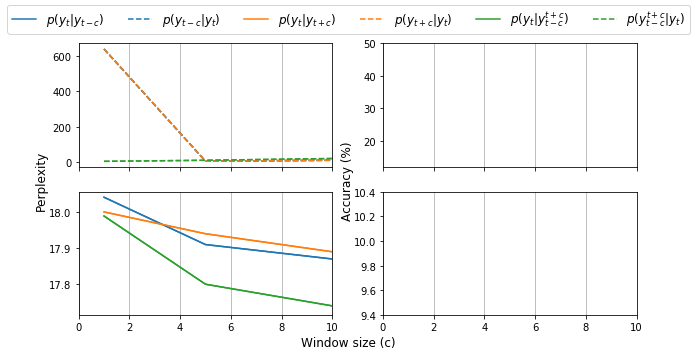

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True)

# Plot on axis (0 = Perplexity, 1 = Accuracy)
for ax in [ax1, ax2]: 
    # ax1 is CBoW
    c_pre, c_post, c_both = ax2[0].plot(perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].pre, '-C0', 
                               perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].post, '-C1', 
                               perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].both, '-C2')
    c_pre, c_post, c_both = ax[1].plot(acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].pre, '-C0', 
                               acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].post, '-C1', 
                               acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].both, '-C2')

    # ax2 is Skip-gram
    s_pre, s_post, s_both = ax1[0].plot(perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].pre, '--C0', 
                               perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].post, '--C1', 
                               perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].both, '--C2')
    s_pre, s_post, s_both = ax[1].plot(acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].pre, '--C0', 
                               acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].post, '--C1', 
                               acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].both, '--C2')

# Hide the spines between CBoW and Skip-gram
d = .015  # how big to make the diagonal lines in axes coordinates

# Make 

# arguments to pass to plot, just so we don't keep repeating them
#for i in range(2): 
#    ax1[i].spines['bottom'].set_visible(False)
#    ax2[i].spines['top'].set_visible(False)
#    ax1[i].xaxis.tick_top()
#    ax1[i].tick_params(labeltop='off')  # don't put tick labels at the top
#    ax2[i].xaxis.tick_bottom()
    
    # Set diagonal lines on split axes
#    kwargs = dict(transform=ax1[i].transAxes, color='k', clip_on=False)
#    ax1[i].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#    ax1[i].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

#    kwargs.update(transform=ax2[i].transAxes)  # switch to the bottom axes
#    ax2[i].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
#    ax2[i].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Set grids
for ax in [ax1, ax2]: 
    ax[0].grid(which='major', axis='x')
    ax[1].grid(which='major', axis='x')
    
    # Set x-limits
    ax[0].set_xlim(0,10)
    ax[1].set_xlim(0,10)

# Set axis limits
#ax1[0].set_ylim(20, 640.1) # Perplexity upper
#ax2[0].set_ylim(3.9, 20.1) # Perplexity lower
ax1[1].set_ylim(12, 50) # Accuracy upper
ax2[1].set_ylim(9.4, 10.4) # Accuracy lower
    
# Set axis labels
fig.text(0.064, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=12)
fig.text(0.49, 0.5, 'Accuracy (%)', va='center', rotation='vertical', fontsize=12)

# Overall figure settings
fig.text(0.5, 0.04, 'Window size (c)', ha='center', fontsize=12)
fig.legend(handles=[c_pre, s_pre, c_post, s_post, c_both, s_both], 
           loc='upper center', 
           labels=['$p(y_t|y_{t-c})$', '$p(y_{t-c}|y_t)$', 
                   '$p(y_t|y_{t+c})$', '$p(y_{t+c}|y_t)$', 
                   '$p(y_t|y_{t-c}^{t+c})$', '$p(y_{t-c}^{t+c}|y_t)$'], 
           ncol=6, fontsize=12)
plt.savefig(wkdir+'performances.pdf', dpi=1000)

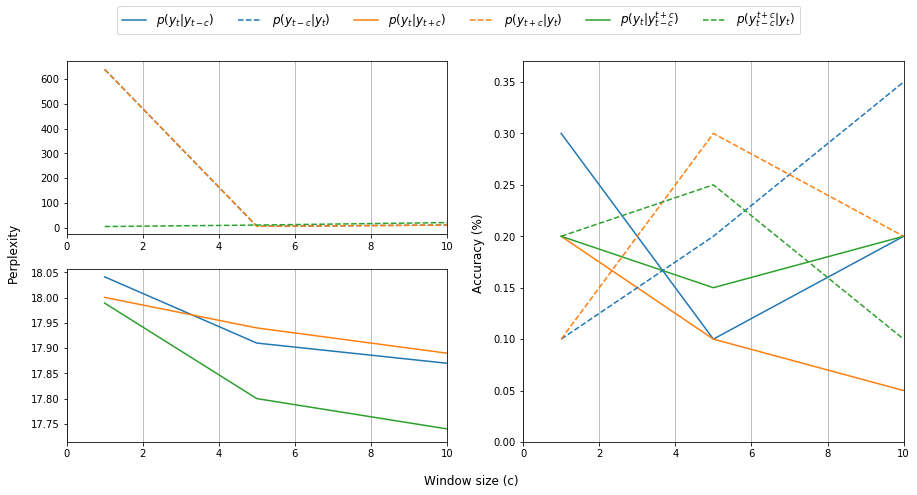

In [48]:
# Make grid of subplots
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)

### Plot on axis
# ax1 is Skip-gram perp
s_pre, s_post, s_both = ax1.plot(perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].pre, '--C0', 
                           perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].post, '--C1', 
                           perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].both, '--C2')

# ax2 is CBoW perp
c_pre, c_post, c_both = ax2.plot(perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].pre, '-C0', 
                           perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].post, '-C1', 
                           perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].both, '-C2')

# ax3 is accuracy
c_pre, c_post, c_both = ax3.plot(acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].pre, '-C0', 
                           acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].post, '-C1', 
                           acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].both, '-C2')
s_pre, s_post, s_both = ax3.plot(acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].pre, '--C0', 
                           acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].post, '--C1', 
                           acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].both, '--C2')

# Set axis grids
for ax in [ax1, ax2, ax3]: 
    ax.set_xlim(0,10)
    ax.grid(which='major', axis='x')
ax3.set_ylim(0, 0.37)
    
# Set axis labels
fig.text(0.07, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.5, 'Accuracy (%)', va='center', rotation='vertical', fontsize=12)

# Overall figure settings
fig.text(0.5, 0.04, 'Window size (c)', ha='center', fontsize=12)
fig.legend(handles=[c_pre, s_pre, c_post, s_post, c_both, s_both], 
           loc='upper center', 
           labels=['$p(y_t|y_{t-c})$', '$p(y_{t-c}|y_t)$', 
                   '$p(y_t|y_{t+c})$', '$p(y_{t+c}|y_t)$', 
                   '$p(y_t|y_{t-c}^{t+c})$', '$p(y_{t-c}^{t+c}|y_t)$'], 
           ncol=6, fontsize=12)

# Save plot
plt.savefig(wkdir+'performances.pdf', dpi=1000)